<a href="https://colab.research.google.com/github/mansuriilham77/kiaprediksi/blob/main/RIZIQ_Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b>A. <span style='color:#3A6D8C'>Introduction</span></b>

Time series analysis adalah metode statistik yang digunakan untuk menganalisis data yang dikumpulkan secara berurutan dari waktu ke waktu. Tujuannya adalah untuk mengidentifikasi pola, tren, dan hubungan dalam data tersebut, serta untuk membuat prediksi tentang nilai di masa depan berdasarkan informasi historis.

# <b>B. <span style='color:#3A6D8C'>Data Digunakan</span></b>

<img src="https://sdgs.uib.ac.id/wp-content/uploads/2023/10/Goal-13.webp" width="60%">

`Climate Action` adalah salah satu tujuan dari Sustainable Development Goals (SDGs) yang dicanangkan oleh PBB. Bertujuan untuk mengatasi perubahan iklim dan dampaknya, serta meningkatkan ketahanan terhadap perubahan iklim di seluruh dunia. Beberapa sasaran utama dari tujuan ini meliputi:

* Mengurangi Emisi Gas Rumah Kaca: Memperkuat upaya global untuk mengurangi emisi yang menyebabkan pemanasan global.
* Adaptasi terhadap Perubahan Iklim: Meningkatkan kemampuan masyarakat dan ekosistem untuk beradaptasi dengan dampak perubahan iklim.
* Integrasi Kebijakan Iklim: Mengintegrasikan tindakan terkait iklim dalam kebijakan nasional, lokal, dan regional.
* Peningkatan Pendidikan dan Kesadaran: Mendorong pendidikan dan kesadaran masyarakat tentang perubahan iklim dan cara mengatasinya.
* Mobilisasi Sumber Daya: Meningkatkan pendanaan untuk inisiatif dan proyek yang bertujuan mengatasi perubahan iklim.

Data yang digunakan bersumber dari https://www.kaggle.com/datasets/greegtitan/indonesia-climate merupakan data

### <b>B.1. <span style='color:#55679C'>Ekstrak Data</span></b>

In [ ]:
import warnings
import numpy as np

warnings.filterwarnings('ignore')

In [ ]:
# Import library yang digunakan
import pandas as pd

# Proses ekstraksi data
data_climate = pd.read_csv(
    '/content/climate_data_kemayoran - climate_data_kemayoran.csv',
    parse_dates = ['date']
)

# Tampilkan data
display(data_climate)

date    Tn    Tx  Tavg  RH_avg   RR   ss  ff_x  ddd_x  ff_avg  \
0     01-01-2010  26.0  32.4  28.7    75.0  0.0  2.9   4.0  225.0     4.0   
1     02-01-2010  25.0  33.8  28.7    73.0  6.6  5.5   5.0  270.0     2.0   
2     03-01-2010  26.0  33.8  28.8    72.0  0.0  2.7   4.0  225.0     3.0   
3     04-01-2010  25.0  33.4  29.9    70.0  0.0  7.7   6.0  270.0     2.0   
4     05-01-2010  24.0  33.0  28.5    70.0  0.4  0.5   5.0  180.0     3.0   
...          ...   ...   ...   ...     ...  ...  ...   ...    ...     ...   
3999  12-05-2015  26.0  34.2  29.4    72.0  0.0  4.2   4.0   90.0     2.0   
4000  07-09-2016  25.0  33.0  27.4    80.0  8.0  7.0   4.0   90.0     2.0   
4001  12-06-2020  24.6  33.6   NaN     NaN  3.5  5.0   3.0  200.0     2.0   
4002  21-06-2020  26.4  32.6  28.9    77.0  0.0  6.3   4.0  280.0     1.0   
4003  15-07-2020  25.4  30.0  27.3    82.0  NaN  2.0   5.0  110.0     3.0   

     ddd_car  station_id  
0          W     96745.0  
1         NW     96745.0  
2         NE     96745.0  
3         SE     96745.0  
4          E     96745.0  
...      ...         ...  
3999       N     96745.0  
4000       E     96745.0  
4001       C     96745.0  
4002       C     96745.0  
4003       E     96745.0  

[4004 rows x 12 columns]

### <b>B.2. <span style='color:#55679C'>Informasi Umum pada Data</span></b>

In [ ]:
# Informasi umum data
data_climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4004 entries, 0 to 4003
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        4004 non-null   object 
 1   Tn          3947 non-null   float64
 2   Tx          3976 non-null   float64
 3   Tavg        3991 non-null   float64
 4   RH_avg      3991 non-null   float64
 5   RR          3662 non-null   float64
 6   ss          3879 non-null   float64
 7   ff_x        4003 non-null   float64
 8   ddd_x       4003 non-null   float64
 9   ff_avg      4002 non-null   float64
 10  ddd_car     4002 non-null   object 
 11  station_id  4003 non-null   float64
dtypes: float64(10), object(2)
memory usage: 375.5+ KB


<b>Data Dictionary</b><br><br>

<table>
        <tr>
            <th>Nama Kolom</th>
            <th>Satuan</th>
            <th>Deskripsi</th>
        </tr>
        <tr>
            <td>Tn</td>
            <td>°C</td>
            <td>Temperatur terendah</td>
        </tr>
        <tr>
            <td>Tx</td>
            <td>°C</td>
            <td>Temperatur tertinggi</td>
        </tr>
        <tr>
            <td>Tavg</td>
            <td>°C</td>
            <td>Temperatur rata-rata</td>
        </tr>
        <tr>
            <td>RH_avg</td>
            <td>%</td>
            <td>Rata-rata kelembapan</td>
        </tr>
        <tr>
            <td>RR</td>
            <td>mm</td>
            <td>Curah hujan</td>
        </tr>
        <tr>
            <td>ss</td>
            <td>jam</td>
            <td>Durasi sinar matahari</td>
        </tr>
        <tr>
            <td>ff_x</td>
            <td>m/s</td>
            <td>Kecepatan angin maksimum</td>
        </tr>
        <tr>
            <td>ddd_x</td>
            <td>°</td>
            <td>Arah angin saat kecepatan maksimum</td>
        </tr>
        <tr>
            <td>ff_avg</td>
            <td>m/s</td>
            <td>Rata-rata kecepatan angin</td>
        </tr>
        <tr>
            <td>ddd_car</td>
            <td>°</td>
            <td>Arah angin utama</td>
        </tr>
        <tr>
            <td>station_id</td>
            <td></td>
            <td>Stasiun pencatatan</td>
        </tr>
</table>

# <b>C. <span style='color:#3A6D8C'>Exploratory Data Analysis</span></b>

### <b>C.1. <span style='color:#55679C'>Main Problem</span></b>

Karena hanya akan dilakukan proses analisa deret waktu 1 variabel (Tavg) saja maka untuk keperluan praktis akan diseleksi kolom yang dibutuhkan yakni date dan Tavg

In [ ]:
# Lakukan seleksi fitur
data_temperatur = data_climate[['date', 'Tavg']]

# Tampilkan hasilnya
data_temperatur.head(10)

date  Tavg
0  01-01-2010  28.7
1  02-01-2010  28.7
2  03-01-2010  28.8
3  04-01-2010  29.9
4  05-01-2010  28.5
5  06-01-2010  28.6
6  07-01-2010  28.1
7  08-01-2010  26.9
8  09-01-2010  27.4
9  10-01-2010  26.4

### <b>C.2. <span style='color:#55679C'>Transformasi Data</span></b>

Karena Time Series membutuhkan kolom tanggal yang proper (berformat YYYY-MM-DD) maka perlu dipastikan apakah kolom tanggal pada data sudah sesuai dengan format tanggal universal. Jika belum maka ubah format tanggal tersebut.

In [ ]:
data_temperatur['date'] = pd.to_datetime(data_temperatur['date'], format = '%d-%m-%Y')
data_temperatur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4004 entries, 0 to 4003
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4004 non-null   datetime64[ns]
 1   Tavg    3991 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 62.7 KB


### <b>C.3. <span style='color:#55679C'>Periksa Ketersediaan Data</span></b>

Periksa ketersediaan data dengan cara memeriksa tanggal awal pengukuran hingga tanggal akhir pengukuran. Hal ini penting untuk dilakukan agar dapat diketahui seberapa lama proses pengukuran data Time Series berlangsung dan perlu dipastikan bahwa datanya tidak ada yang terlewati

In [ ]:
# Mencari data minimum dan maksimum
min_date = data_temperatur['date'].min()
max_date = data_temperatur['date'].max()

# Tampilkan tanggal
print(f'Data dari tanggal {min_date.date()} sampai dengan {max_date.date()}')

Data dari tanggal 2010-01-01 sampai dengan 2020-12-31


In [ ]:
from datetime import datetime

# Menghitung selisih
selisih = max_date - min_date

# Menampilkan hasil
print(f"Selisih hari antara {max_date.date()} dengan {min_date.date()} adalah {selisih.days} hari")
print(f"Sedangkan banyak datanya {data_temperatur.shape[0]}")

print(f"\n\033[93mKesimpulan\033[0m : ", end = '')
if(selisih.days == data_temperatur.shape[0]):
    print('Data Lengkap')
else:
    print(f'Data Belum Lengkap, terdapat selisih {abs(selisih.days - data_temperatur.shape[0])} hari')

Selisih hari antara 2020-12-31 dengan 2010-01-01 adalah 4017 hari
Sedangkan banyak datanya 4004

Kesimpulan : Data Belum Lengkap, terdapat selisih 13 hari


Karena ditemukan 13 tanggal yang terlewat, maka akan dibuat skenario untuk 'menambal' tanggal yang hilang

In [ ]:
# Buat rentang tanggal
full_date = pd.date_range(
    start = min_date,
    end = max_date
)

# Buat menjadi dataframe
full_date = full_date.to_frame(name = 'Full Date').reset_index(drop = True)

# Tampilkan datanya
display(full_date)

Full Date
0    2010-01-01
1    2010-01-02
2    2010-01-03
3    2010-01-04
4    2010-01-05
...         ...
4013 2020-12-27
4014 2020-12-28
4015 2020-12-29
4016 2020-12-30
4017 2020-12-31

[4018 rows x 1 columns]

Lakukan proses join dari data asli ke master tanggal agar diperoleh data dengan tanggal yang lengkap. Kemudian periksa hasilnya

In [ ]:
data_temperatur = full_date.merge(data_temperatur, left_on = 'Full Date', right_on = 'date', how = 'left')
data_temperatur = data_temperatur.sort_values(by = 'Full Date', ascending = True, ignore_index = True)
data_temperatur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Full Date  4018 non-null   datetime64[ns]
 1   date       4004 non-null   datetime64[ns]
 2   Tavg       3991 non-null   float64       
dtypes: datetime64[ns](2), float64(1)
memory usage: 94.3 KB


In [ ]:
data_temperatur[data_temperatur['date'].isna()]

Full Date date  Tavg
3909 2020-09-14  NaT   NaN
3910 2020-09-15  NaT   NaN
3911 2020-09-16  NaT   NaN
3912 2020-09-17  NaT   NaN
3913 2020-09-18  NaT   NaN
3914 2020-09-19  NaT   NaN
3915 2020-09-20  NaT   NaN
3916 2020-09-21  NaT   NaN
3917 2020-09-22  NaT   NaN
3918 2020-09-23  NaT   NaN
3919 2020-09-24  NaT   NaN
3920 2020-09-25  NaT   NaN
3921 2020-09-26  NaT   NaN
3922 2020-09-27  NaT   NaN

In [ ]:
# Copy tanggal lengkap ke tanggal asli yang kosong
data_temperatur['date'] = data_temperatur['Full Date']

In [ ]:
data_temperatur[data_temperatur['date'].isna()]

Empty DataFrame
Columns: [Full Date, date, Tavg]
Index: []

### <b>C.4. <span style='color:#55679C'>Plot Time Series</span></b>

Plot time series adalah alat yang sangat berguna untuk analisis data. Biasanya dengan line chart. Dengan memberikan visualisasi yang jelas, akan memungkinkan pengamat untuk mengambil wawasan yang signifikan dari data yang disajikan, yang dapat digunakan untuk pengambilan keputusan yang lebih baik.

In [ ]:
# Import library plotly untuk visualisasi data
import numpy as np
import plotly.express as px

def plot_timeseries(
    data : pd.DataFrame,
    value : str,
    judul : str,
    warna : str = 'black',
    showxaxis : bool = False,
    showtrend : bool = False,
):
    fig = px.line(
        data_frame = data,
        x = data.index,
        y = value,
        color_discrete_sequence = [warna]
    )

    if(showtrend):
        # Hitung koefisien regresi linier
        coefficients = np.polyfit(range(len(data)), data[value].fillna(data[value].median()), 1)
        slope = coefficients[0]
        intercept = coefficients[1]

        # Tambahkan garis regresi ke plot
        fig.add_scatter(
            x = data.index,
            y = range(len(data)) * slope + intercept,
            mode = 'lines',
            line = dict(
                color = 'black',
                dash = 'dash'
            )
        )

    if(showxaxis):
        fig.add_hline(
            y = 0,
            line = dict(
                color = 'LightSeaGreen',
                width = 2,
                dash = 'dash',
            ),
        )

    fig.update_layout(
        width = 1200,
        height = 500,
        showlegend = False,
        plot_bgcolor = 'rgba(0, 0, 0, 0)',
        title = dict(
            text = judul,
            font = dict(
                size = 28,
                color = '#757882'
            ),
            y = 0.92,
            x = 0.5
        ),
        yaxis = dict(
            title = '',
            showgrid = False,
            showline = False,
            showticklabels = False,
            zeroline = False,
        ),
        margin = dict(
            t = 80,
            b = 10,
            r = 20
        )
    )

    fig.show()

In [ ]:
title = f"""
  <b><span style='color:#000435'>Pengukuran Temperatur dari Stasiun Cuaca Kemayoran</span></b><br><sup><sup>
  {min_date.strftime('%B')} {min_date.strftime('%Y')} hingga {max_date.strftime('%B')} {max_date.strftime('%Y')}</sup></sup>
"""

plot_timeseries(
    data = data_temperatur.set_index('Full Date'),
    value = 'Tavg',
    judul = title,
    warna = '#37AFE1',
    showtrend = True,
)

Jika diperhatikan terdapat plot terputus yang mengindikasikan adanya missing value pada 14 September 2020 hingga 27 September 2020

In [ ]:
plot_timeseries(
    data = data_temperatur.set_index('Full Date'),
    value = 'Tavg',
    judul = title,
    warna = '#37AFE1',
    showtrend = True,
)

### <b>C.5. <span style='color:#55679C'>Missing Data</span></b>

Pada permasalahan Time Series, penting untuk memastikan bahwa datanya lengkap. Menangani missing values dalam data time series tidak hanya meningkatkan kualitas analisis tetapi juga memastikan bahwa hasil yang didapat adalah representatif dan dapat diandalkan untuk pengambilan keputusan.

In [ ]:
# Periksa missing value pada kolom Tavg
data_temperatur[data_temperatur['Tavg'].isna()]

Full Date       date  Tavg
1853 2015-01-28 2015-01-28   NaN
1854 2015-01-29 2015-01-29   NaN
1897 2015-03-13 2015-03-13   NaN
1900 2015-03-16 2015-03-16   NaN
1901 2015-03-17 2015-03-17   NaN
1911 2015-03-27 2015-03-27   NaN
1950 2015-05-05 2015-05-05   NaN
1997 2015-06-21 2015-06-21   NaN
2102 2015-10-04 2015-10-04   NaN
2115 2015-10-17 2015-10-17   NaN
3699 2020-02-17 2020-02-17   NaN
3709 2020-02-27 2020-02-27   NaN
3815 2020-06-12 2020-06-12   NaN
3909 2020-09-14 2020-09-14   NaN
3910 2020-09-15 2020-09-15   NaN
3911 2020-09-16 2020-09-16   NaN
3912 2020-09-17 2020-09-17   NaN
3913 2020-09-18 2020-09-18   NaN
3914 2020-09-19 2020-09-19   NaN
3915 2020-09-20 2020-09-20   NaN
3916 2020-09-21 2020-09-21   NaN
3917 2020-09-22 2020-09-22   NaN
3918 2020-09-23 2020-09-23   NaN
3919 2020-09-24 2020-09-24   NaN
3920 2020-09-25 2020-09-25   NaN
3921 2020-09-26 2020-09-26   NaN
3922 2020-09-27 2020-09-27   NaN

Missing value pada data time series untuk pengukuran suhu bisa terjadi karena gagalnya sistem pada pencatatan ke basis data atau mungkin sistem mengalami kerusakan. Terlihat pada tanggal 14 September 2020 hingga 27 September 2020 (13 hari) terlihat data yang hilang yang kemungkinan terjadi kerusakan pada sistem.

Karena pada data terdapat 27 data yang nilainya hilang (kosong) maka dipandang perlu untuk melakukan imputasi data. Untuk melakukan imputasi pada data Time Series lakukan langkah berikut :      


references : *https://medium.com/@aaabulkhair/data-imputation-demystified-time-series-data-69bc9c798cb7*

#### <b>C.4.1. <span style='color:#55679C'>Set Index pada Data Temperatur</span></b>

In [ ]:
# Buat index pada kolom tanggal
data_temperatur = data_temperatur.set_index('Full Date')
data_temperatur.head()

date  Tavg
Full Date                  
2010-01-01 2010-01-01  28.7
2010-01-02 2010-01-02  28.7
2010-01-03 2010-01-03  28.8
2010-01-04 2010-01-04  29.9
2010-01-05 2010-01-05  28.5

#### <b>C.4.2. <span style='color:#55679C'>Ambil Index pada Data Temperatur yang Kosong</span></b>

In [ ]:
# Periksa index data missing value
imputed_indices = data_temperatur[data_temperatur['Tavg'].isnull()].index

# Tampilkan hasilnya
display(imputed_indices)

DatetimeIndex(['2015-01-28', '2015-01-29', '2015-03-13', '2015-03-16',
               '2015-03-17', '2015-03-27', '2015-05-05', '2015-06-21',
               '2015-10-04', '2015-10-17', '2020-02-17', '2020-02-27',
               '2020-06-12', '2020-09-14', '2020-09-15', '2020-09-16',
               '2020-09-17', '2020-09-18', '2020-09-19', '2020-09-20',
               '2020-09-21', '2020-09-22', '2020-09-23', '2020-09-24',
               '2020-09-25', '2020-09-26', '2020-09-27'],
              dtype='datetime64[ns]', name='Full Date', freq=None)

#### <b>C.4.3. <span style='color:#55679C'>Ambil Data Seasonal</span></b>

In [ ]:
# Import library yang digunakan
from statsmodels.tsa.seasonal import STL

# Apply dekomposisi STL
stl = STL(data_temperatur['Tavg'].interpolate())
res = stl.fit()

# Ekstraksi seasonal dan trend
seasonal_component = res.seasonal

#### <b>C.4.4. <span style='color:#55679C'>Kurangkan dengan Komponen Seasonal</span></b>

In [ ]:
# Buat deseasonalised series
df_deseasonalised = data_temperatur['Tavg'] - seasonal_component

#### <b>C.4.5. <span style='color:#55679C'>Lakukan Interpolasi Kembali dan Tambahkan Komponen Seasonal</span></b>

In [ ]:
# Interpolasi missing values pada deseasonalised series
df_deseasonalised_imputed = df_deseasonalised.interpolate(method = 'linear')

# Tambahkan seasonal component kembali untuk membuat final imputed series
df_imputed = df_deseasonalised_imputed + seasonal_component

#### <b>C.4.6. <span style='color:#55679C'>Lakukan Imputasi</span></b>

In [ ]:
# Update the original dataframe with the imputed values
data_temperatur.loc[imputed_indices, 'Tavg'] = df_imputed[imputed_indices]

In [ ]:
title = f"""
  <b><span style='color:#000435'>Pengukuran Temperatur dari Stasiun Cuaca Kemayoran</span></b><br><sup><sup>
  {min_date.strftime('%B')} {min_date.strftime('%Y')} hingga {max_date.strftime('%B')} {max_date.strftime('%Y')}</sup></sup>
"""

plot_timeseries(
    data = data_temperatur,
    value = 'Tavg',
    judul = title,
    warna = '#37AFE1',
    showtrend = True,
)

### <b>C.6. <span style='color:#55679C'>Duplicated Data</span></b>

In [ ]:
print(f'Jumlah duplikasi data = {data_temperatur.duplicated().sum()}')

Jumlah duplikasi data = 0


### <b>C.7. <span style='color:#55679C'>Iklim & Statistik</span></b>

Karena data diukur di Stasiun Cuaca Kemayoran, Jakarta maka musimnya akan ikut aturan musim di Indonesia yakni musim kemarau dan musim hujan. Menurut beberapa sumber musim di Indonesia dibagi menjadi :      
* Musim Kemarau : Mei - September
* Musim Hujan : Oktober - April
<br>

Asumsikan musim tersebut benar terjadi di bulan yang telah disebutkan. Kemudian akan ditelusuri nilai statistiknya

In [ ]:
from datetime import datetime

# Ambil data dari 2018-10-01 sampai 2019-09-30
data_temperatur_2018_2019 = data_temperatur.loc['2018-10-01':'2019-09-30']

# Tambahkan kolom bulan
nama_bulan = [
    "October", "November", "December", "January", "February", "March",
     "April", "May", "June", "July", "August", "September"
]

data_temperatur_2018_2019['Bulan'] = data_temperatur_2018_2019['date'].dt.strftime('%B')
data_temperatur_2018_2019['Bulan'] = pd.Categorical(data_temperatur_2018_2019['Bulan'], categories=nama_bulan, ordered=True)

# Tambahkan kriteria musim
data_temperatur_2018_2019['Musim'] = data_temperatur_2018_2019['date']\
    .apply(lambda x: 'Hujan' if (datetime(2018, 10, 1) <= x and x <= datetime(2019, 4, 30)) else 'Kemarau')

# Tampilkan hasilnya
display(data_temperatur_2018_2019)

date  Tavg      Bulan    Musim
Full Date                                      
2018-10-01 2018-10-01  29.3    October    Hujan
2018-10-02 2018-10-02  29.0    October    Hujan
2018-10-03 2018-10-03  29.4    October    Hujan
2018-10-04 2018-10-04  29.5    October    Hujan
2018-10-05 2018-10-05  30.8    October    Hujan
...               ...   ...        ...      ...
2019-09-26 2019-09-26  29.9  September  Kemarau
2019-09-27 2019-09-27  29.9  September  Kemarau
2019-09-28 2019-09-28  29.4  September  Kemarau
2019-09-29 2019-09-29  29.1  September  Kemarau
2019-09-30 2019-09-30  29.6  September  Kemarau

[365 rows x 4 columns]

In [ ]:
data_temperatur_2018_2019.groupby(['Musim'], as_index = False).agg(
    min_temp = ('Tavg', 'min'),
    max_temp = ('Tavg', 'max'),
    rata_rata_temp = ('Tavg', 'mean'),
    median_temp = ('Tavg', 'median'),
    std_temp = ('Tavg', 'std'),
    jumlah_data = ('Tavg', 'count')
)

Musim  min_temp  max_temp  rata_rata_temp  median_temp  std_temp  \
0    Hujan      25.7      30.8       28.629245         28.6  0.926950   
1  Kemarau      26.6      30.6       28.926797         28.9  0.741975   

   jumlah_data  
0          212  
1          153

In [ ]:
data_temperatur_2018_2019.groupby(['Bulan'], as_index = False).agg(
    min_temp = ('Tavg', 'min'),
    max_temp = ('Tavg', 'max'),
    rata_rata_temp = ('Tavg', 'mean'),
    median_temp = ('Tavg', 'median'),
    std_temp = ('Tavg', 'std'),
    jumlah_data = ('Tavg', 'count')
)

Bulan  min_temp  max_temp  rata_rata_temp  median_temp  std_temp  \
0     October      27.0      30.8       29.480645        29.50  0.677948   
1    November      27.5      30.5       28.900000        28.90  0.794811   
2    December      26.7      30.2       28.741935        28.90  0.835374   
3     January      26.0      29.7       27.954839        28.00  0.900681   
4    February      26.8      29.7       28.275000        28.30  0.731120   
5       March      25.7      29.4       28.158065        28.30  0.762353   
6       April      27.7      30.7       28.876667        28.70  0.843917   
7         May      28.4      30.6       29.635484        29.60  0.630634   
8        June      28.4      30.0       29.176667        29.15  0.421560   
9        July      27.4      29.9       28.712903        28.70  0.618461   
10     August      26.6      29.4       28.277419        28.30  0.574868   
11  September      27.0      29.9       28.836667        28.85  0.670298   

    jumlah_data  
0            31  
1            30  
2            31  
3            31  
4            28  
5            31  
6            30  
7            31  
8            30  
9            31  
10           31  
11           30

In [ ]:
plot_timeseries(
    data = data_temperatur.loc['2018-10-01':'2019-09-30'],
    value = 'Tavg',
    judul = title,
    warna = '#37AFE1',
    showtrend = True,
)

### <b>C.8. <span style='color:#55679C'>Outlier</span></b>

In [ ]:
# Histogram outlier
import plotly.express as px

def plot_outiler(data, column, color, title = None):
    fig = px.box(
        data,
        x = column,
        color_discrete_sequence = [color],
    )

    fig.update_traces(
          marker_line_width = 1,
          marker_line_color = 'white'
    )

    if(title is None):
        title = f"<b>Box Plot <span style='color:{color};'>{column.capitalize()}</b>"

    fig.update_layout(
        width = 1200,
        height = 500,
        plot_bgcolor = 'rgba(0, 0, 0, 0)',
        title = dict(
            text = title,
            font = dict(
                size = 28,
                color = '#757882'
            ),
            y = 0.92,
            x = 0.5
        ),
        yaxis = dict(
            title = '',
            showgrid = False,
            showline = False,
            showticklabels = False,
            zeroline = False,
        ),
        margin = dict(
            t = 80,
            b = 10,
            r = 20
        )
    )

    fig.show(renderer = 'colab')

In [ ]:
plot_outiler(
    data = data_temperatur,
    column = 'Tavg',
    color = '#37AFE1'
)

# <b>D. <span style='color:#3A6D8C'>Komponen Time Series</span></b>

<img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*1fcxme1rEwgFGaY2BW2EAA.png" width="60%">

* `Trend` : Arah jangka panjang dari data. Trend menunjukan naik, turun, atau tetap stabil (stasioner) pada data Time Series.
* `Seasonality` : Fluktuasi berulang (musiman) yang terjadi pada interval waktu tertentu, biasanya dalam periode mingguan, bulanan, tahunan, dsb.
* `Cyclic` : Siklus adalah fluktuasi yang terjadi dalam periode waktu yang tidak tetap dan lebih lama
* `Irregular` : Komponen yang mencakup fluktuasi acak yang tidak dapat dijelaskan oleh tren, musiman, atau siklus dan sering kali dianggap sebagai noise dalam data.

Gunakan `seasonal_decompose` pada library statsmodels untuk mengetahui komponen pada data Time Series

*Untuk keperluan praktis hanya akan digunakan data di tahun 2020 saja*

In [ ]:
# Filter data tahun 2020 saja
data_temperatur_2020 = data_temperatur.loc['2020-01-01':'2020-12-31']

data_temperatur_2020.head()

date  Tavg
Full Date                  
2020-01-01 2020-01-01  26.8
2020-01-02 2020-01-02  27.6
2020-01-03 2020-01-03  28.5
2020-01-04 2020-01-04  28.3
2020-01-05 2020-01-05  27.9

In [ ]:
# Import library yang dibutuhkan
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose # Penting ini

# Proses dekomposisi musiman
result = seasonal_decompose(
    data_temperatur_2020['Tavg'],
    model = 'additive' # ini opsional
)

In [ ]:
# Definisikan komponen
data_plot = dict(
    data = [pd.DataFrame(result.trend), pd.DataFrame(result.seasonal), pd.DataFrame(result.resid)],
    value = ['trend', 'seasonal', 'resid'],
    color = ['#091057', '#024CAA', '#EC8305'],
    showtrend = [True, False, True]
)

# Lakukan plotting
for i in range(3):
    plot_timeseries(
        data = data_plot.get('data')[i],
        value = data_plot.get('value')[i],
        judul = f"<b><span style='color:{data_plot.get('color')[i]}'>{data_plot.get('value')[i].upper()}</span></b>",
        warna = data_plot.get('color')[i],
        showtrend = data_plot.get('showtrend')[i],
    )

Dari hasil grafik diatas, terlihat :      
* `Trend Positif` yang artinya suhu dari januari 2020 hingga Desember 2020 mengalami kenaikan seiring berjalannya waktu
* `Seasonal` tiap 7 hari
* `Residu` atau Irregular yang merupakan fluktuatif acak

# <b>E. <span style='color:#3A6D8C'>Stasioneritas</span></b>

Sebuah time series dianggap stasioner jika karakteristiknya tidak berubah seiring waktu.

<img src="https://miro.medium.com/v2/resize:fit:1400/1*0vp3L0WZV_HkqS53H6skjg.png" width="60%">

Uji stasioner pada data time series dapat dilakukan dengan dua cara yakni dengan memplot grafik atau melakukan uji statistic. Uji statistic kestasioneran data bisa dilakukan dengan UJI KPSS



### <b>E.1. <span style='color:#55679C'>Uji Stasioner : Kwiatkowski - Phillips - Schmidt - Shin</span></b>

Uji KPSS, kependekan dari, Kwiatkowski - Phillips - Schmidt - Shin (KPSS), adalah jenis uji akar Unit yang menguji stasioneritas rangkaian tertentu pada tren deterministik.

**Hipotesa Null (H0)** : Trend data terindikasi stasioner.

**Hipotesa Alternatif (H1)** :  Data terindikasi non-stasioner atau memiliki *unit root*.

docs : <i>https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.kpss.html</i>

In [ ]:
# Import library yang dibutuhkan
from statsmodels.tsa import stattools

def uji_kpss(data, alpha):
    # Proses pengujian kpss
    kpss_test = stattools.kpss(
        data,
        regression = 'c',
        nlags = 'auto'
    )[ : 3]

    # Pengambilan Kesimpulan berdasarkan p-value
    if(kpss_test[1] < alpha):
        kpss_test += ('H0 ditolak', 'Data terindikasi Non-Stasioner')
    else:
        kpss_test += ('H0 diterima', 'Data terindikasi Stasioner')

    # Jadikan dataframe
    output_kpss = pd.DataFrame({
        'Keterangan' : ['Uji Statistik', 'p-value', 'Lags digunakan', 'Hasil Uji', 'Kesimpulan'],
        'Nilai uji' : kpss_test
    })

    return(output_kpss)

In [ ]:
# Toleransi error 5%
alpha = 0.05

# Panggil fungsinya
kpss_result = uji_kpss(data_temperatur_2020['Tavg'], alpha)

# Tampilkan hasil
display(kpss_result)

Keterangan                       Nilai uji
0   Uji Statistik                        0.721778
1         p-value                        0.011566
2  Lags digunakan                               9
3       Hasil Uji                      H0 ditolak
4      Kesimpulan  Data terindikasi Non-Stasioner

https://www.kaggle.com/code/iamleonie/time-series-interpreting-acf-and-pacf

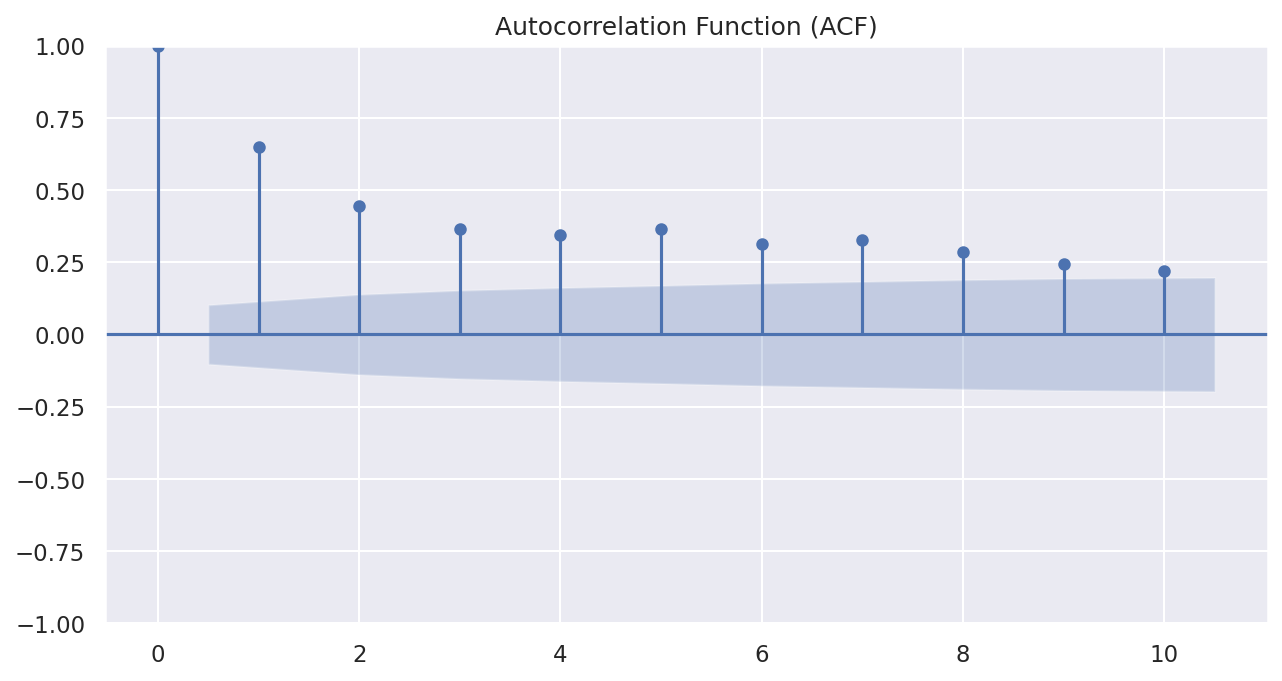

In [ ]:
# Import library seaborn dan matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Setting kedalaman kualitas grafik dalam dpi (deep per inch)
sns.set(
    rc = {
        'figure.figsize' : (10, 5),
        'figure.dpi' : 150
    }
)

plot_acf(data_temperatur_2020[['Tavg']], lags=10)
plt.title('Autocorrelation Function (ACF)')
plt.show()

---

# <b>F. <span style='color:#3A6D8C'>Pre-Processing</span></b>

## <b>F.1. <span style='color:#3A6D8C'>Handling Outlier</span></b>

Jika terdapat outlier pada model time series, lebih baik untuk dilakukan cleansing terlebih dahulu

In [ ]:
# Deteksi outlier pada data yang digunakan untuk modelling
plot_outiler(
    data = data_temperatur_2020,
    column = 'Tavg',
    color = '#37AFE1',
    title = f"<b>Box Plot <span style='color:#133E87;'>Temperatur</b><br><sup><sup>Tahun 2020</sup></sup>"
)

In [ ]:
def replace_outliers_iqr(df):

    # Menghitung Q1 dan Q3
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    # Menentukan batas bawah dan atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Mengganti outlier
    df = np.select(
        [df > upper_bound, df < lower_bound],
        [upper_bound, lower_bound],
        default = df
    )

    return df

In [ ]:
# Proses pembersihan outlier
data_temperatur_2020['Tavg'] = replace_outliers_iqr(data_temperatur_2020['Tavg'])

In [ ]:
# Deteksi outlier pada data yang digunakan untuk modelling
plot_outiler(
    data = data_temperatur_2020,
    column = 'Tavg',
    color = '#37AFE1',
    title = f"<b>Box Plot <span style='color:#133E87;'>Temperatur</b><br><sup><sup>Tahun 2020 (After Clean Outlier)</sup></sup>"
)

## <b>F.2. <span style='color:#3A6D8C'>Inisialisasi Data Train & Test</span></b>

Train-test split pada time series berbeda dengan metode yang digunakan untuk data lainnya. Dalam data time series, penting untuk mempertahankan urutan waktu saat membagi dataset (tidak lagi diacak).

In [ ]:
# Hitung banyak data
banyak_data = data_temperatur_2020.shape[0]
print(f'Banyak data = {banyak_data}')

# Inisialisasi proporsi yang digunakan
train_proportion = 0.8
test_proportion = 1 - train_proportion

# Hitung banyak data train dan test
train_size = int(banyak_data * train_proportion)
test_size = banyak_data - train_size

# Tampilkan data
print(f'Banyak data train = {train_size}')
print(f'Banyak data test = {test_size}')

Banyak data = 366
Banyak data train = 292
Banyak data test = 74


In [ ]:
# Proses pembagian data
X_train = data_temperatur_2020.iloc[:train_size]
X_test = data_temperatur_2020.iloc[train_size:]

# Tampilkan data train
display(X_train)

date  Tavg
Full Date                  
2020-01-01 2020-01-01  26.8
2020-01-02 2020-01-02  27.6
2020-01-03 2020-01-03  28.5
2020-01-04 2020-01-04  28.3
2020-01-05 2020-01-05  27.9
...               ...   ...
2020-10-14 2020-10-14  29.8
2020-10-15 2020-10-15  30.0
2020-10-16 2020-10-16  28.4
2020-10-17 2020-10-17  28.7
2020-10-18 2020-10-18  28.8

[292 rows x 2 columns]

In [ ]:
# Tampilkan data test
display(X_test)

date  Tavg
Full Date                  
2020-10-19 2020-10-19  28.6
2020-10-20 2020-10-20  28.6
2020-10-21 2020-10-21  27.3
2020-10-22 2020-10-22  28.8
2020-10-23 2020-10-23  29.8
...               ...   ...
2020-12-27 2020-12-27  29.4
2020-12-28 2020-12-28  29.1
2020-12-29 2020-12-29  28.3
2020-12-30 2020-12-30  28.0
2020-12-31 2020-12-31  26.5

[74 rows x 2 columns]

# <b>G. <span style='color:#3A6D8C'>Modelling</span></b>

## <b>F.1. <span style='color:#3A6D8C'>FB Prophet</span></b>

FB Prophet adalah sebuah alat open-source yang dikembangkan oleh Facebook untuk membantu dalam peramalan time series, yaitu data yang diambil dalam urutan waktu. Alat ini dirancang untuk mudah digunakan dan dapat menangani data yang memiliki musiman, tren, dan variasi yang tidak teratur.

docs : http://facebook.github.io/prophet/

### <b>F.1.1. <span style='color:#3A6D8C'>Model FB Prophet dengan Parameter Default</span></b>

In [ ]:
# Untuk fbprophet kolom tanggal diberi nama ds dan kolom nilai diberi nama y
X_train = X_train.rename(columns = {
    'date' : 'ds',
    'Tavg' : 'y'
})

In [ ]:
from prophet import Prophet

# Membuat model Prophet
model = Prophet()

# Melatih model
model.fit(X_train)

# Membuat DataFrame untuk prediksi
future = model.make_future_dataframe(periods = X_test.shape[0])

# Membuat ramalan
forecast = model.predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/kkte7vv1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/b9f7z9ll.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10086', 'data', 'file=/tmp/tmpo2hh2i96/kkte7vv1.json', 'init=/tmp/tmpo2hh2i96/b9f7z9ll.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelgj7uc4sp/prophet_model-20241101123917.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast_train = forecast.iloc[:train_size][['ds', 'yhat']]
forecast_test = forecast.iloc[train_size:][['ds', 'yhat']]

In [ ]:
hasil_prediksi = X_test.merge(forecast_test, left_on = 'date', right_on = 'ds', how = 'left').drop('ds', axis = 1)
hasil_prediksi['selisih_mutlak'] = abs(hasil_prediksi['Tavg'] - hasil_prediksi['yhat'])
hasil_prediksi

date  Tavg       yhat  selisih_mutlak
0  2020-10-19  28.6  29.468618        0.868618
1  2020-10-20  28.6  29.528747        0.928747
2  2020-10-21  27.3  29.592744        2.292744
3  2020-10-22  28.8  29.405121        0.605121
4  2020-10-23  29.8  29.319988        0.480012
..        ...   ...        ...             ...
69 2020-12-27  29.4  29.822883        0.422883
70 2020-12-28  29.1  29.919509        0.819509
71 2020-12-29  28.3  29.979638        1.679638
72 2020-12-30  28.0  30.043635        2.043635
73 2020-12-31  26.5  29.856012        3.356012

[74 rows x 4 columns]

### <b>F.1.2. <span style='color:#3A6D8C'>Evaluasi Model</span></b>

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(hasil_prediksi['Tavg'], hasil_prediksi['yhat'])
print(f'Mean Squared Error (MSE): {mse}')

mae = mean_absolute_error(hasil_prediksi['Tavg'], hasil_prediksi['yhat'])
print(f'Mean Absolute Error (MAE): {mae}')

Mean Squared Error (MSE): 2.401895249620567
Mean Absolute Error (MAE): 1.2858189257227715


In [ ]:
# Import library plotly untuk visualisasi data
import plotly.express as px

def plot_prediksi(hasil_prediksi, x, y, mae, params = None):
    fig = px.line(
        data_frame = hasil_prediksi,
        x = x,
        y = y,
        color_discrete_sequence = ['#10375C', '#F3C623']
    )

    fig.update_layout(
        width = 1200,
        height = 500,
        showlegend = False,
        plot_bgcolor = 'rgba(0, 0, 0, 0)',
        title = dict(
            text = f"<b>Hasil Prediksi (MAE : {mae})<b><br><sup><sup><span style='color:#000435;font-size:10'>Parameter : {params}</span></sup></sup>",
            font = dict(
                size = 28,
                color = '#757882'
            ),
            y = 0.92,
            x = 0.5
        ),
        yaxis = dict(
            title = '',
            showgrid = False,
            showline = False,
            showticklabels = False,
            zeroline = False,
        ),
        margin = dict(
            t = 80,
            b = 10,
            r = 20
        )
    )

    fig.show(rendere = 'colab')

In [ ]:
plot_prediksi(
    hasil_prediksi,
    x = 'date',
    y = ['Tavg', 'yhat'],
    mae = mae,
    params = None)

### <b>F.1.3. <span style='color:#3A6D8C'>HyperParameter Tunning FB Prophet</span></b>

In [ ]:
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_absolute_error

# Menentukan parameter grid untuk tuning
param_grid = {
    'daily_seasonality': [False, True],
    'weekly_seasonality': [False, True],
    'yearly_seasonality': [False, True],
    'changepoint_prior_scale': [0.01, 0.1, 0.5],
    'seasonality_prior_scale': [1, 10, 20],
    'seasonality_mode' : ['additive', 'multiplicative'],
}

# Menyimpan hasil
results = list()

# Melakukan grid search
for params in ParameterGrid(param_grid):
    model = Prophet(**params)
    model.fit(X_train)

    # Membuat prediksi
    future = model.make_future_dataframe(periods = X_test.shape[0])
    forecast = model.predict(future)

    # Menghitung MAE untuk data test
    mae = mean_absolute_error(X_test['Tavg'], forecast.iloc[train_size:]['yhat'])
    results.append({'params': params, 'mae': mae})

    forecast_test = forecast.iloc[train_size:][['ds', 'yhat']]
    hasil_prediksi = X_test.merge(forecast_test, left_on = 'date', right_on = 'ds', how = 'left').drop('ds', axis = 1)

    plot_prediksi(
        hasil_prediksi,
        x = 'date',
        y = ['Tavg', 'yhat'],
        mae = round(mae, 4),
        params = params
    )

    if(len(results) == 1):
        best_mae = mae
        best_params = params
        best_forecast = forecast
    else:
        if(mae < best_mae):
            best_mae = mae
            best_params = params
            best_forecast = forecast

DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/2tk9hcz6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/lvjuufq5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66838', 'data', 'file=/tmp/tmpo2hh2i96/2tk9hcz6.json', 'init=/tmp/tmpo2hh2i96/lvjuufq5.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelq60f21_3/prophet_model-20241101123918.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/m7i_yvi0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/nhlf6_zt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97361', 'data', 'file=/tmp/tmpo2hh2i96/m7i_yvi0.json', 'init=/tmp/tmpo2hh2i96/nhlf6_zt.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelim3vcp9_/prophet_model-20241101123918.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/_4d3thz3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/i_z3fs4c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19411', 'data', 'file=/tmp/tmpo2hh2i96/_4d3thz3.json', 'init=/tmp/tmpo2hh2i96/i_z3fs4c.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_model888z21hh/prophet_model-20241101123918.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/48mvb9gl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/i13mrf3s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=869', 'data', 'file=/tmp/tmpo2hh2i96/48mvb9gl.json', 'init=/tmp/tmpo2hh2i96/i13mrf3s.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_model6zuxz0q1/prophet_model-20241101123919.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/xt99y0r6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/aw1j5rkt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18420', 'data', 'file=/tmp/tmpo2hh2i96/xt99y0r6.json', 'init=/tmp/tmpo2hh2i96/aw1j5rkt.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelkpizzbrr/prophet_model-20241101123919.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/g0nhp_sg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/y28_71a3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41171', 'data', 'file=/tmp/tmpo2hh2i96/g0nhp_sg.json', 'init=/tmp/tmpo2hh2i96/y28_71a3.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelt6k_562z/prophet_model-20241101123919.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/szmyk7si.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/qy6no8db.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41857', 'data', 'file=/tmp/tmpo2hh2i96/szmyk7si.json', 'init=/tmp/tmpo2hh2i96/qy6no8db.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_model44cg6po3/prophet_model-20241101123919.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/_r36dvq5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/28l2d65d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5527', 'data', 'file=/tmp/tmpo2hh2i96/_r36dvq5.json', 'init=/tmp/tmpo2hh2i96/28l2d65d.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelnfskqr6_/prophet_model-20241101123920.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/npemxvom.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/h_2tvenp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93542', 'data', 'file=/tmp/tmpo2hh2i96/npemxvom.json', 'init=/tmp/tmpo2hh2i96/h_2tvenp.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelf7fpityg/prophet_model-20241101123920.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/2n8nfp3v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/lno5dm0h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88397', 'data', 'file=/tmp/tmpo2hh2i96/2n8nfp3v.json', 'init=/tmp/tmpo2hh2i96/lno5dm0h.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_model02kmkh1f/prophet_model-20241101123920.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/z938ft5a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/8mctf4ar.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52930', 'data', 'file=/tmp/tmpo2hh2i96/z938ft5a.json', 'init=/tmp/tmpo2hh2i96/8mctf4ar.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelg6t5d9ot/prophet_model-20241101123920.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/tbiiwy2z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/0w8bwjs8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42273', 'data', 'file=/tmp/tmpo2hh2i96/tbiiwy2z.json', 'init=/tmp/tmpo2hh2i96/0w8bwjs8.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelz_9f7cqa/prophet_model-20241101123921.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/2bjex5nz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/l9l4tn1t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57344', 'data', 'file=/tmp/tmpo2hh2i96/2bjex5nz.json', 'init=/tmp/tmpo2hh2i96/l9l4tn1t.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_model1ihhojia/prophet_model-20241101123921.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/jrvotenn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/h59dnlhf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10548', 'data', 'file=/tmp/tmpo2hh2i96/jrvotenn.json', 'init=/tmp/tmpo2hh2i96/h59dnlhf.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_model0xtz_mg3/prophet_model-20241101123921.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/2id3kya_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/9ilno67q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50006', 'data', 'file=/tmp/tmpo2hh2i96/2id3kya_.json', 'init=/tmp/tmpo2hh2i96/9ilno67q.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_model2fs22s4h/prophet_model-20241101123922.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/sezee9je.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/1ims04ki.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71932', 'data', 'file=/tmp/tmpo2hh2i96/sezee9je.json', 'init=/tmp/tmpo2hh2i96/1ims04ki.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_model_cm3nm5m/prophet_model-20241101123922.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/waa48_83.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/pgzsvelf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33455', 'data', 'file=/tmp/tmpo2hh2i96/waa48_83.json', 'init=/tmp/tmpo2hh2i96/pgzsvelf.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelpkeoqcwo/prophet_model-20241101123922.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/e8vfl2pm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/qy0fbio1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49091', 'data', 'file=/tmp/tmpo2hh2i96/e8vfl2pm.json', 'init=/tmp/tmpo2hh2i96/qy0fbio1.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_model5hhbyh4f/prophet_model-20241101123922.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/ivj8950f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/v1yqj2ez.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42260', 'data', 'file=/tmp/tmpo2hh2i96/ivj8950f.json', 'init=/tmp/tmpo2hh2i96/v1yqj2ez.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_model4pmfdku9/prophet_model-20241101123923.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/9qhd9h75.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/go0abc68.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77420', 'data', 'file=/tmp/tmpo2hh2i96/9qhd9h75.json', 'init=/tmp/tmpo2hh2i96/go0abc68.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelj2bfsyg8/prophet_model-20241101123923.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/tz8i2yh7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/ihv35v9e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7314', 'data', 'file=/tmp/tmpo2hh2i96/tz8i2yh7.json', 'init=/tmp/tmpo2hh2i96/ihv35v9e.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelankxj2rs/prophet_model-20241101123923.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/5mou2wb8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/37nxwvre.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9571', 'data', 'file=/tmp/tmpo2hh2i96/5mou2wb8.json', 'init=/tmp/tmpo2hh2i96/37nxwvre.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modeltcrkr81c/prophet_model-20241101123923.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/fz1zv_uj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/906vf6yp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42021', 'data', 'file=/tmp/tmpo2hh2i96/fz1zv_uj.json', 'init=/tmp/tmpo2hh2i96/906vf6yp.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelb5gc537s/prophet_model-20241101123924.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/ntvt0o8d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/gmbsekdh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47464', 'data', 'file=/tmp/tmpo2hh2i96/ntvt0o8d.json', 'init=/tmp/tmpo2hh2i96/gmbsekdh.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_model1nvc4vie/prophet_model-20241101123924.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/7vog1q2w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/zlc8k6qy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36130', 'data', 'file=/tmp/tmpo2hh2i96/7vog1q2w.json', 'init=/tmp/tmpo2hh2i96/zlc8k6qy.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelu24b6xa_/prophet_model-20241101123924.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/b8hvic_0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/hnrf_qqs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11589', 'data', 'file=/tmp/tmpo2hh2i96/b8hvic_0.json', 'init=/tmp/tmpo2hh2i96/hnrf_qqs.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelzysw29ql/prophet_model-20241101123925.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/b7mv953d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/u5ko99xi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83072', 'data', 'file=/tmp/tmpo2hh2i96/b7mv953d.json', 'init=/tmp/tmpo2hh2i96/u5ko99xi.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modeln_dmkfnk/prophet_model-20241101123925.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/h476szr9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/_qkj0mnq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12125', 'data', 'file=/tmp/tmpo2hh2i96/h476szr9.json', 'init=/tmp/tmpo2hh2i96/_qkj0mnq.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modeljup7dhnj/prophet_model-20241101123925.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/p9o8qetn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/3iwwc3w2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11801', 'data', 'file=/tmp/tmpo2hh2i96/p9o8qetn.json', 'init=/tmp/tmpo2hh2i96/3iwwc3w2.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelnp599urg/prophet_model-20241101123926.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/_12bvsn2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/2ozay68o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5082', 'data', 'file=/tmp/tmpo2hh2i96/_12bvsn2.json', 'init=/tmp/tmpo2hh2i96/2ozay68o.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_model7jiqg1lw/prophet_model-20241101123926.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/g0z2rln8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/p_hwtxia.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30310', 'data', 'file=/tmp/tmpo2hh2i96/g0z2rln8.json', 'init=/tmp/tmpo2hh2i96/p_hwtxia.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modeltsi8gu19/prophet_model-20241101123926.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/uuafsb6b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/e9wbci5f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12993', 'data', 'file=/tmp/tmpo2hh2i96/uuafsb6b.json', 'init=/tmp/tmpo2hh2i96/e9wbci5f.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelsmmqt13h/prophet_model-20241101123927.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/kwxjdzko.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/4q2q181n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28839', 'data', 'file=/tmp/tmpo2hh2i96/kwxjdzko.json', 'init=/tmp/tmpo2hh2i96/4q2q181n.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modeloxq51fqw/prophet_model-20241101123927.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/nvlhrot1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/f21fk1v4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79672', 'data', 'file=/tmp/tmpo2hh2i96/nvlhrot1.json', 'init=/tmp/tmpo2hh2i96/f21fk1v4.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelcsajxpqs/prophet_model-20241101123928.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/xtac28oz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/0vr4epi0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39981', 'data', 'file=/tmp/tmpo2hh2i96/xtac28oz.json', 'init=/tmp/tmpo2hh2i96/0vr4epi0.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelzb2i_5vl/prophet_model-20241101123928.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/ic7ymmej.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/qj2rgwc6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18296', 'data', 'file=/tmp/tmpo2hh2i96/ic7ymmej.json', 'init=/tmp/tmpo2hh2i96/qj2rgwc6.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelx79n40j2/prophet_model-20241101123928.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/s91j_v9q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/nqfnsocm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40977', 'data', 'file=/tmp/tmpo2hh2i96/s91j_v9q.json', 'init=/tmp/tmpo2hh2i96/nqfnsocm.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_model0x35afyl/prophet_model-20241101123929.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/sn0jy1ha.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/izbj05fq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24001', 'data', 'file=/tmp/tmpo2hh2i96/sn0jy1ha.json', 'init=/tmp/tmpo2hh2i96/izbj05fq.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modeltuy5xx_9/prophet_model-20241101123929.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/n0juf5vh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/8j_ngb4u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73238', 'data', 'file=/tmp/tmpo2hh2i96/n0juf5vh.json', 'init=/tmp/tmpo2hh2i96/8j_ngb4u.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelpm6qsq96/prophet_model-20241101123930.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/1liwy954.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/e85itqmw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68120', 'data', 'file=/tmp/tmpo2hh2i96/1liwy954.json', 'init=/tmp/tmpo2hh2i96/e85itqmw.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelw2qx6qfb/prophet_model-20241101123930.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/wk2o6ca8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/jz23kh_2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62983', 'data', 'file=/tmp/tmpo2hh2i96/wk2o6ca8.json', 'init=/tmp/tmpo2hh2i96/jz23kh_2.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelmxk3thqf/prophet_model-20241101123931.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/10lqxnre.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/e49xtv5n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62123', 'data', 'file=/tmp/tmpo2hh2i96/10lqxnre.json', 'init=/tmp/tmpo2hh2i96/e49xtv5n.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelyynq28kv/prophet_model-20241101123931.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/ev5lw_v_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/sy3mvw8b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95280', 'data', 'file=/tmp/tmpo2hh2i96/ev5lw_v_.json', 'init=/tmp/tmpo2hh2i96/sy3mvw8b.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelay1b_p12/prophet_model-20241101123931.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/6im4qbpr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/lieh850k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24868', 'data', 'file=/tmp/tmpo2hh2i96/6im4qbpr.json', 'init=/tmp/tmpo2hh2i96/lieh850k.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelaz42vuyy/prophet_model-20241101123932.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/qkp8pm87.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/9xad4wze.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42211', 'data', 'file=/tmp/tmpo2hh2i96/qkp8pm87.json', 'init=/tmp/tmpo2hh2i96/9xad4wze.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_model2zv28qab/prophet_model-20241101123932.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/6oxnoopt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/p_meigkc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19642', 'data', 'file=/tmp/tmpo2hh2i96/6oxnoopt.json', 'init=/tmp/tmpo2hh2i96/p_meigkc.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelhod25naf/prophet_model-20241101123933.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/rv7yn0w2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/jufhsxfa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5373', 'data', 'file=/tmp/tmpo2hh2i96/rv7yn0w2.json', 'init=/tmp/tmpo2hh2i96/jufhsxfa.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelzn0pueyx/prophet_model-20241101123933.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/sp4lqoaj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/uozo6sy0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64149', 'data', 'file=/tmp/tmpo2hh2i96/sp4lqoaj.json', 'init=/tmp/tmpo2hh2i96/uozo6sy0.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelowwuw9jy/prophet_model-20241101123933.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/zr4u6fic.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/ek6ktdei.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63337', 'data', 'file=/tmp/tmpo2hh2i96/zr4u6fic.json', 'init=/tmp/tmpo2hh2i96/ek6ktdei.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_model_5vccrt6/prophet_model-20241101123934.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/p3w8_e2l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/h01t6bhi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33853', 'data', 'file=/tmp/tmpo2hh2i96/p3w8_e2l.json', 'init=/tmp/tmpo2hh2i96/h01t6bhi.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelmj3hqsyi/prophet_model-20241101123934.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/fcem80ly.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/_pz87hhp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97901', 'data', 'file=/tmp/tmpo2hh2i96/fcem80ly.json', 'init=/tmp/tmpo2hh2i96/_pz87hhp.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modellsaf0dty/prophet_model-20241101123934.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/xv3pvyh6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/oavlw1mv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19515', 'data', 'file=/tmp/tmpo2hh2i96/xv3pvyh6.json', 'init=/tmp/tmpo2hh2i96/oavlw1mv.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelk9_560su/prophet_model-20241101123934.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/_29_2k24.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/10_42vnt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89600', 'data', 'file=/tmp/tmpo2hh2i96/_29_2k24.json', 'init=/tmp/tmpo2hh2i96/10_42vnt.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelqm3yr3_0/prophet_model-20241101123935.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/bcxwg15d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/wjcdm5wa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84155', 'data', 'file=/tmp/tmpo2hh2i96/bcxwg15d.json', 'init=/tmp/tmpo2hh2i96/wjcdm5wa.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modely8a_72cs/prophet_model-20241101123935.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/g0xs6j7l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/x6w6qx_d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12203', 'data', 'file=/tmp/tmpo2hh2i96/g0xs6j7l.json', 'init=/tmp/tmpo2hh2i96/x6w6qx_d.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelmru43_0y/prophet_model-20241101123935.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/h4g7gso0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/5w89ssml.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36126', 'data', 'file=/tmp/tmpo2hh2i96/h4g7gso0.json', 'init=/tmp/tmpo2hh2i96/5w89ssml.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_model3kp9wgiw/prophet_model-20241101123936.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/pwhrl1qw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/t9s0y616.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97035', 'data', 'file=/tmp/tmpo2hh2i96/pwhrl1qw.json', 'init=/tmp/tmpo2hh2i96/t9s0y616.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelw8vu3lr_/prophet_model-20241101123936.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/oc7qq6u1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/o9xpacv1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7760', 'data', 'file=/tmp/tmpo2hh2i96/oc7qq6u1.json', 'init=/tmp/tmpo2hh2i96/o9xpacv1.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelb_epdh6l/prophet_model-20241101123936.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/48b4sj8f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/4slln2xw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77748', 'data', 'file=/tmp/tmpo2hh2i96/48b4sj8f.json', 'init=/tmp/tmpo2hh2i96/4slln2xw.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modeltfosnq1r/prophet_model-20241101123937.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/514c9isb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/ig1e0eor.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67337', 'data', 'file=/tmp/tmpo2hh2i96/514c9isb.json', 'init=/tmp/tmpo2hh2i96/ig1e0eor.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_model2b_2ias9/prophet_model-20241101123937.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/1_k5xrvt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/vyoxil0b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25715', 'data', 'file=/tmp/tmpo2hh2i96/1_k5xrvt.json', 'init=/tmp/tmpo2hh2i96/vyoxil0b.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelqhk8g7la/prophet_model-20241101123937.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/331a70md.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/2e8fur6z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24091', 'data', 'file=/tmp/tmpo2hh2i96/331a70md.json', 'init=/tmp/tmpo2hh2i96/2e8fur6z.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_model0xl9qc8j/prophet_model-20241101123938.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/8157cych.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/qi90r54u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45058', 'data', 'file=/tmp/tmpo2hh2i96/8157cych.json', 'init=/tmp/tmpo2hh2i96/qi90r54u.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_model9ex2rb7f/prophet_model-20241101123938.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/l8bikfue.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/mvmos4ma.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75351', 'data', 'file=/tmp/tmpo2hh2i96/l8bikfue.json', 'init=/tmp/tmpo2hh2i96/mvmos4ma.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelve9h8wyt/prophet_model-20241101123938.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/3wdr9z28.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/3gklbe61.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75561', 'data', 'file=/tmp/tmpo2hh2i96/3wdr9z28.json', 'init=/tmp/tmpo2hh2i96/3gklbe61.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelsj76zl77/prophet_model-20241101123939.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/yw78dqg3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/vg5to9qp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82004', 'data', 'file=/tmp/tmpo2hh2i96/yw78dqg3.json', 'init=/tmp/tmpo2hh2i96/vg5to9qp.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_model8wukfquq/prophet_model-20241101123939.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/ym0o7o1k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/dp55iagv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65884', 'data', 'file=/tmp/tmpo2hh2i96/ym0o7o1k.json', 'init=/tmp/tmpo2hh2i96/dp55iagv.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelh7iptuna/prophet_model-20241101123939.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/qqfnfigm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/4y6k0wzj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68874', 'data', 'file=/tmp/tmpo2hh2i96/qqfnfigm.json', 'init=/tmp/tmpo2hh2i96/4y6k0wzj.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelzj8brrm0/prophet_model-20241101123940.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/o2gepbf3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/5vddkyg5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29980', 'data', 'file=/tmp/tmpo2hh2i96/o2gepbf3.json', 'init=/tmp/tmpo2hh2i96/5vddkyg5.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelxdq98qk4/prophet_model-20241101123940.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/srr3juvu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/pg412_s9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49218', 'data', 'file=/tmp/tmpo2hh2i96/srr3juvu.json', 'init=/tmp/tmpo2hh2i96/pg412_s9.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modeli5x0evgq/prophet_model-20241101123941.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/7t4v2cx4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/gkcn9lez.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36488', 'data', 'file=/tmp/tmpo2hh2i96/7t4v2cx4.json', 'init=/tmp/tmpo2hh2i96/gkcn9lez.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modeldiabhw0p/prophet_model-20241101123941.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/2vrr50pw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/gjlbdzvj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30041', 'data', 'file=/tmp/tmpo2hh2i96/2vrr50pw.json', 'init=/tmp/tmpo2hh2i96/gjlbdzvj.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelr3x9fn0z/prophet_model-20241101123941.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/_qggwfmh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/iyo59620.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75597', 'data', 'file=/tmp/tmpo2hh2i96/_qggwfmh.json', 'init=/tmp/tmpo2hh2i96/iyo59620.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelx9_49re4/prophet_model-20241101123942.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/mktkhdqi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/dbyn8135.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32305', 'data', 'file=/tmp/tmpo2hh2i96/mktkhdqi.json', 'init=/tmp/tmpo2hh2i96/dbyn8135.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelf4kbrwn5/prophet_model-20241101123942.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/q7l89v9s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/pdxwn0rg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87731', 'data', 'file=/tmp/tmpo2hh2i96/q7l89v9s.json', 'init=/tmp/tmpo2hh2i96/pdxwn0rg.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelmeprbntg/prophet_model-20241101123942.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/eg0kflum.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/c5xg32in.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86189', 'data', 'file=/tmp/tmpo2hh2i96/eg0kflum.json', 'init=/tmp/tmpo2hh2i96/c5xg32in.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_model7osmravo/prophet_model-20241101123943.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/0qs3eaye.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/fq0wrrd9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80263', 'data', 'file=/tmp/tmpo2hh2i96/0qs3eaye.json', 'init=/tmp/tmpo2hh2i96/fq0wrrd9.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modela1uptjh_/prophet_model-20241101123943.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/3xbkd4jh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/jq2857ds.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31230', 'data', 'file=/tmp/tmpo2hh2i96/3xbkd4jh.json', 'init=/tmp/tmpo2hh2i96/jq2857ds.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_model5kfdejd6/prophet_model-20241101123944.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/7kkc9pgi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/4yfp4sjv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75200', 'data', 'file=/tmp/tmpo2hh2i96/7kkc9pgi.json', 'init=/tmp/tmpo2hh2i96/4yfp4sjv.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modeljoznej30/prophet_model-20241101123944.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/gpkh_n6g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/74cjo0u8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11694', 'data', 'file=/tmp/tmpo2hh2i96/gpkh_n6g.json', 'init=/tmp/tmpo2hh2i96/74cjo0u8.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelg5t4fjw0/prophet_model-20241101123945.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/zxnvun8t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/v1bz9y4j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16118', 'data', 'file=/tmp/tmpo2hh2i96/zxnvun8t.json', 'init=/tmp/tmpo2hh2i96/v1bz9y4j.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelci0djxh1/prophet_model-20241101123945.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/43xaptei.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/_tff2fix.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92401', 'data', 'file=/tmp/tmpo2hh2i96/43xaptei.json', 'init=/tmp/tmpo2hh2i96/_tff2fix.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modeldetkkon_/prophet_model-20241101123946.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/2igswo1m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/fqmb4eoh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98900', 'data', 'file=/tmp/tmpo2hh2i96/2igswo1m.json', 'init=/tmp/tmpo2hh2i96/fqmb4eoh.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelb_jx4wur/prophet_model-20241101123946.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/uqjrz4xt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/urelbf7u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56582', 'data', 'file=/tmp/tmpo2hh2i96/uqjrz4xt.json', 'init=/tmp/tmpo2hh2i96/urelbf7u.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelb8obuhrd/prophet_model-20241101123947.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/4ix9odqu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/g0maxabv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79760', 'data', 'file=/tmp/tmpo2hh2i96/4ix9odqu.json', 'init=/tmp/tmpo2hh2i96/g0maxabv.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelhog_6zer/prophet_model-20241101123947.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/1cgsjl6h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/pnm8o2ey.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83967', 'data', 'file=/tmp/tmpo2hh2i96/1cgsjl6h.json', 'init=/tmp/tmpo2hh2i96/pnm8o2ey.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelx3im2cbu/prophet_model-20241101123948.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/cn3rizbp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/hyjvcghd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59325', 'data', 'file=/tmp/tmpo2hh2i96/cn3rizbp.json', 'init=/tmp/tmpo2hh2i96/hyjvcghd.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_model8ta14fde/prophet_model-20241101123948.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/j1_8r6d5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/su1y8m05.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56796', 'data', 'file=/tmp/tmpo2hh2i96/j1_8r6d5.json', 'init=/tmp/tmpo2hh2i96/su1y8m05.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelvbho4nc4/prophet_model-20241101123949.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/peemj_dq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/2_p88fd3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24690', 'data', 'file=/tmp/tmpo2hh2i96/peemj_dq.json', 'init=/tmp/tmpo2hh2i96/2_p88fd3.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelgwh5ng0v/prophet_model-20241101123949.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/jp0xdlvq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/yczkq34s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40370', 'data', 'file=/tmp/tmpo2hh2i96/jp0xdlvq.json', 'init=/tmp/tmpo2hh2i96/yczkq34s.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelic7ecsys/prophet_model-20241101123950.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/t6ju2bkp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/jcmhgzfb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52505', 'data', 'file=/tmp/tmpo2hh2i96/t6ju2bkp.json', 'init=/tmp/tmpo2hh2i96/jcmhgzfb.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelce8591fu/prophet_model-20241101123950.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/x9_m9b9p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/n1czu9rz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97580', 'data', 'file=/tmp/tmpo2hh2i96/x9_m9b9p.json', 'init=/tmp/tmpo2hh2i96/n1czu9rz.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_model7pkwvufv/prophet_model-20241101123951.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/nafo0sl9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/k4yu_jwd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75841', 'data', 'file=/tmp/tmpo2hh2i96/nafo0sl9.json', 'init=/tmp/tmpo2hh2i96/k4yu_jwd.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modeldq93zh03/prophet_model-20241101123951.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/4h1m5ekv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/2nbuacmv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38167', 'data', 'file=/tmp/tmpo2hh2i96/4h1m5ekv.json', 'init=/tmp/tmpo2hh2i96/2nbuacmv.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelqcvcah8b/prophet_model-20241101123951.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/demtq7dz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/4gs92uok.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70241', 'data', 'file=/tmp/tmpo2hh2i96/demtq7dz.json', 'init=/tmp/tmpo2hh2i96/4gs92uok.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_model6qrq4iep/prophet_model-20241101123952.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/4_zte22u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/ddyc80y_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98505', 'data', 'file=/tmp/tmpo2hh2i96/4_zte22u.json', 'init=/tmp/tmpo2hh2i96/ddyc80y_.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_model8ttgyr0s/prophet_model-20241101123952.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/y4lsd3i9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/6kcf9jr5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73556', 'data', 'file=/tmp/tmpo2hh2i96/y4lsd3i9.json', 'init=/tmp/tmpo2hh2i96/6kcf9jr5.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_model9is80u8x/prophet_model-20241101123953.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/1lnulgip.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/tjwnpzim.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51481', 'data', 'file=/tmp/tmpo2hh2i96/1lnulgip.json', 'init=/tmp/tmpo2hh2i96/tjwnpzim.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelb5y4ixh1/prophet_model-20241101123953.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/798uvwkl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/b6zdgvyt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26007', 'data', 'file=/tmp/tmpo2hh2i96/798uvwkl.json', 'init=/tmp/tmpo2hh2i96/b6zdgvyt.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelu_qcd0ty/prophet_model-20241101123953.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/ck3dwwfj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/sdky4ik9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45282', 'data', 'file=/tmp/tmpo2hh2i96/ck3dwwfj.json', 'init=/tmp/tmpo2hh2i96/sdky4ik9.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_model8dakzz0o/prophet_model-20241101123954.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/7vv9hrag.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/g0ueyrie.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82001', 'data', 'file=/tmp/tmpo2hh2i96/7vv9hrag.json', 'init=/tmp/tmpo2hh2i96/g0ueyrie.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelzxt8xm6w/prophet_model-20241101123954.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/0zuo31fd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/2epmn3be.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30794', 'data', 'file=/tmp/tmpo2hh2i96/0zuo31fd.json', 'init=/tmp/tmpo2hh2i96/2epmn3be.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelnvbqylgv/prophet_model-20241101123955.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/hewnqxas.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/gd9x57q7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10101', 'data', 'file=/tmp/tmpo2hh2i96/hewnqxas.json', 'init=/tmp/tmpo2hh2i96/gd9x57q7.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_model_efdu8zf/prophet_model-20241101123955.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/yc7ljip1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/yny4vued.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1318', 'data', 'file=/tmp/tmpo2hh2i96/yc7ljip1.json', 'init=/tmp/tmpo2hh2i96/yny4vued.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelo6a6332h/prophet_model-20241101123956.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/hugnfjm5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/35rhqgl8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93518', 'data', 'file=/tmp/tmpo2hh2i96/hugnfjm5.json', 'init=/tmp/tmpo2hh2i96/35rhqgl8.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_model4psr3k2d/prophet_model-20241101123956.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/zp4jz82f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/0zywjr_5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47651', 'data', 'file=/tmp/tmpo2hh2i96/zp4jz82f.json', 'init=/tmp/tmpo2hh2i96/0zywjr_5.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelna0yt47o/prophet_model-20241101123956.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/696e5sr3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/u_onbyao.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23446', 'data', 'file=/tmp/tmpo2hh2i96/696e5sr3.json', 'init=/tmp/tmpo2hh2i96/u_onbyao.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelrhli_e1m/prophet_model-20241101123957.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/_tth_2tp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/u6y_u4pt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68599', 'data', 'file=/tmp/tmpo2hh2i96/_tth_2tp.json', 'init=/tmp/tmpo2hh2i96/u6y_u4pt.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_model3f8l0tkq/prophet_model-20241101123957.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/64tuai7w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/leljhiov.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88300', 'data', 'file=/tmp/tmpo2hh2i96/64tuai7w.json', 'init=/tmp/tmpo2hh2i96/leljhiov.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modeln0t9lp7h/prophet_model-20241101123958.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/noeryu42.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/t2o_kbdx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38506', 'data', 'file=/tmp/tmpo2hh2i96/noeryu42.json', 'init=/tmp/tmpo2hh2i96/t2o_kbdx.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_model3yolq0k8/prophet_model-20241101123958.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/1s_4cpha.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/p6cxrz5g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57154', 'data', 'file=/tmp/tmpo2hh2i96/1s_4cpha.json', 'init=/tmp/tmpo2hh2i96/p6cxrz5g.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelkbam_fsq/prophet_model-20241101123958.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/77mxa8px.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/anq722mv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99668', 'data', 'file=/tmp/tmpo2hh2i96/77mxa8px.json', 'init=/tmp/tmpo2hh2i96/anq722mv.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelczo6qgt4/prophet_model-20241101123959.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/s5b9t8h6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/9s6_7nfs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15219', 'data', 'file=/tmp/tmpo2hh2i96/s5b9t8h6.json', 'init=/tmp/tmpo2hh2i96/9s6_7nfs.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelgh7e4dxe/prophet_model-20241101123959.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:40:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/oxgep8a7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/1j_pmyml.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12508', 'data', 'file=/tmp/tmpo2hh2i96/oxgep8a7.json', 'init=/tmp/tmpo2hh2i96/1j_pmyml.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelmg2qns3j/prophet_model-20241101124000.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:40:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:40:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/_c9d4ghk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/rcq2u5m4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40710', 'data', 'file=/tmp/tmpo2hh2i96/_c9d4ghk.json', 'init=/tmp/tmpo2hh2i96/rcq2u5m4.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelq7bo5xsq/prophet_model-20241101124000.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:40:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:40:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/gv1f_2b2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/p5eteu4q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9305', 'data', 'file=/tmp/tmpo2hh2i96/gv1f_2b2.json', 'init=/tmp/tmpo2hh2i96/p5eteu4q.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modely83g1op8/prophet_model-20241101124001.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:40:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:40:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/7v9gi3_n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/mcf_ls7f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19963', 'data', 'file=/tmp/tmpo2hh2i96/7v9gi3_n.json', 'init=/tmp/tmpo2hh2i96/mcf_ls7f.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelfdj293zz/prophet_model-20241101124001.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:40:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:40:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/8s4744wb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/jc98ya4p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10201', 'data', 'file=/tmp/tmpo2hh2i96/8s4744wb.json', 'init=/tmp/tmpo2hh2i96/jc98ya4p.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_model79umthue/prophet_model-20241101124002.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:40:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:40:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/0h9f6xyj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/ssjofps5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80493', 'data', 'file=/tmp/tmpo2hh2i96/0h9f6xyj.json', 'init=/tmp/tmpo2hh2i96/ssjofps5.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_model9rkyv9a3/prophet_model-20241101124002.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:40:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:40:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/ubm8rbyp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/_nmpdt88.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36510', 'data', 'file=/tmp/tmpo2hh2i96/ubm8rbyp.json', 'init=/tmp/tmpo2hh2i96/_nmpdt88.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modeli7khya98/prophet_model-20241101124003.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:40:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:40:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/aeulxbn9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/c9emdj9b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92184', 'data', 'file=/tmp/tmpo2hh2i96/aeulxbn9.json', 'init=/tmp/tmpo2hh2i96/c9emdj9b.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_model41efx62m/prophet_model-20241101124003.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:40:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:40:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/vyq5231q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/gu3nfxto.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45247', 'data', 'file=/tmp/tmpo2hh2i96/vyq5231q.json', 'init=/tmp/tmpo2hh2i96/gu3nfxto.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelwo6cjsj2/prophet_model-20241101124004.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:40:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:40:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/hgqmly1n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/ywwgcbr2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44204', 'data', 'file=/tmp/tmpo2hh2i96/hgqmly1n.json', 'init=/tmp/tmpo2hh2i96/ywwgcbr2.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_model5ppiyspz/prophet_model-20241101124004.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:40:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:40:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/js3m705e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/3ebbi4bv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82870', 'data', 'file=/tmp/tmpo2hh2i96/js3m705e.json', 'init=/tmp/tmpo2hh2i96/3ebbi4bv.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_model3kbe4xlh/prophet_model-20241101124005.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:40:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:40:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/cx2jwdww.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/b1kcndmx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35661', 'data', 'file=/tmp/tmpo2hh2i96/cx2jwdww.json', 'init=/tmp/tmpo2hh2i96/b1kcndmx.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_model8yljrfe7/prophet_model-20241101124005.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:40:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:40:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/fkne6_vm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/r_uyfst3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14724', 'data', 'file=/tmp/tmpo2hh2i96/fkne6_vm.json', 'init=/tmp/tmpo2hh2i96/r_uyfst3.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelzrwos9kp/prophet_model-20241101124006.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:40:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:40:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/2h6xae__.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/lg60kp5g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45038', 'data', 'file=/tmp/tmpo2hh2i96/2h6xae__.json', 'init=/tmp/tmpo2hh2i96/lg60kp5g.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelt3qijngo/prophet_model-20241101124006.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:40:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:40:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/xwo56gg2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/orshpdhl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71639', 'data', 'file=/tmp/tmpo2hh2i96/xwo56gg2.json', 'init=/tmp/tmpo2hh2i96/orshpdhl.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modeloxu2lp51/prophet_model-20241101124007.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:40:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:40:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/d4ypjum1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/71t1a1k0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10997', 'data', 'file=/tmp/tmpo2hh2i96/d4ypjum1.json', 'init=/tmp/tmpo2hh2i96/71t1a1k0.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_model8fihxuo5/prophet_model-20241101124007.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:40:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:40:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/nwj3vlge.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/dheu_cyv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62969', 'data', 'file=/tmp/tmpo2hh2i96/nwj3vlge.json', 'init=/tmp/tmpo2hh2i96/dheu_cyv.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelevcix5z5/prophet_model-20241101124008.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:40:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:40:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/3w6rgpjb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/cq2tgg0q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57791', 'data', 'file=/tmp/tmpo2hh2i96/3w6rgpjb.json', 'init=/tmp/tmpo2hh2i96/cq2tgg0q.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelyg9m4n4_/prophet_model-20241101124008.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:40:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:40:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/4tsxk6b5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/4sidsocs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89857', 'data', 'file=/tmp/tmpo2hh2i96/4tsxk6b5.json', 'init=/tmp/tmpo2hh2i96/4sidsocs.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_model6zj92xbo/prophet_model-20241101124009.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:40:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:40:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/imsdsk5g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/lhd0t2lq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48652', 'data', 'file=/tmp/tmpo2hh2i96/imsdsk5g.json', 'init=/tmp/tmpo2hh2i96/lhd0t2lq.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modeluyeh6wxg/prophet_model-20241101124009.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:40:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:40:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/3bg03obq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/64ftnnj1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90617', 'data', 'file=/tmp/tmpo2hh2i96/3bg03obq.json', 'init=/tmp/tmpo2hh2i96/64ftnnj1.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_model6p10txp2/prophet_model-20241101124010.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:40:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:40:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/orwp8ue0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/1y0xw953.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71107', 'data', 'file=/tmp/tmpo2hh2i96/orwp8ue0.json', 'init=/tmp/tmpo2hh2i96/1y0xw953.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelyipsba5b/prophet_model-20241101124010.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:40:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:40:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/ygdgsw_5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/0wd0cb51.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67334', 'data', 'file=/tmp/tmpo2hh2i96/ygdgsw_5.json', 'init=/tmp/tmpo2hh2i96/0wd0cb51.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelh1x7gxzr/prophet_model-20241101124011.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:40:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:40:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/qvvdhf1o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/tperyxu_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91200', 'data', 'file=/tmp/tmpo2hh2i96/qvvdhf1o.json', 'init=/tmp/tmpo2hh2i96/tperyxu_.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_model8_g3lfnd/prophet_model-20241101124012.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:40:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:40:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/z1rvfglr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/g8fegerw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15344', 'data', 'file=/tmp/tmpo2hh2i96/z1rvfglr.json', 'init=/tmp/tmpo2hh2i96/g8fegerw.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelzdpuj7bo/prophet_model-20241101124012.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:40:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:40:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/hyx_k2g8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/e0ceect0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53688', 'data', 'file=/tmp/tmpo2hh2i96/hyx_k2g8.json', 'init=/tmp/tmpo2hh2i96/e0ceect0.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelf_22vns_/prophet_model-20241101124013.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:40:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:40:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/6agx13u8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/2yg0w56f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71954', 'data', 'file=/tmp/tmpo2hh2i96/6agx13u8.json', 'init=/tmp/tmpo2hh2i96/2yg0w56f.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_model_chfjhfc/prophet_model-20241101124013.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:40:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:40:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/soehec8z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/vmci0og1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94974', 'data', 'file=/tmp/tmpo2hh2i96/soehec8z.json', 'init=/tmp/tmpo2hh2i96/vmci0og1.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelphjh59hi/prophet_model-20241101124014.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:40:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:40:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/a8lwq7uj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/ej129xh_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75125', 'data', 'file=/tmp/tmpo2hh2i96/a8lwq7uj.json', 'init=/tmp/tmpo2hh2i96/ej129xh_.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelx4g_76v7/prophet_model-20241101124015.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:40:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:40:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/f371rwcs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/56g74qbd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70697', 'data', 'file=/tmp/tmpo2hh2i96/f371rwcs.json', 'init=/tmp/tmpo2hh2i96/56g74qbd.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelk0o_bhhu/prophet_model-20241101124015.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:40:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:40:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/921qiggz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2hh2i96/x7s1o1ve.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91205', 'data', 'file=/tmp/tmpo2hh2i96/921qiggz.json', 'init=/tmp/tmpo2hh2i96/x7s1o1ve.json', 'output', 'file=/tmp/tmpo2hh2i96/prophet_modelkf075x64/prophet_model-20241101124016.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:40:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:40:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Mengatur maksimal lebar tampilan kolom
pd.set_option('display.max_colwidth', None)

# Buat DataFrame
pd.DataFrame(results)\
  .sort_values(by = 'mae', ignore_index = True)

params  \
0     {'changepoint_prior_scale': 0.5, 'daily_seasonality': True, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 20, 'weekly_seasonality': False, 'yearly_seasonality': False}   
1     {'changepoint_prior_scale': 0.5, 'daily_seasonality': True, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10, 'weekly_seasonality': False, 'yearly_seasonality': False}   
2      {'changepoint_prior_scale': 0.5, 'daily_seasonality': True, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1, 'weekly_seasonality': False, 'yearly_seasonality': False}   
3          {'changepoint_prior_scale': 0.01, 'daily_seasonality': True, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 20, 'weekly_seasonality': False, 'yearly_seasonality': False}   
4    {'changepoint_prior_scale': 0.01, 'daily_seasonality': True, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 20, 'weekly_seasonality': False, 'yearly_seasonality': False}   
..                                                                                                                                                                                           ...   
139         {'changepoint_prior_scale': 0.5, 'daily_seasonality': False, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 20, 'weekly_seasonality': False, 'yearly_seasonality': True}   
140           {'changepoint_prior_scale': 0.5, 'daily_seasonality': True, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10, 'weekly_seasonality': True, 'yearly_seasonality': True}   
141          {'changepoint_prior_scale': 0.5, 'daily_seasonality': False, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 20, 'weekly_seasonality': True, 'yearly_seasonality': True}   
142    {'changepoint_prior_scale': 0.5, 'daily_seasonality': False, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 20, 'weekly_seasonality': True, 'yearly_seasonality': True}   
143         {'changepoint_prior_scale': 0.5, 'daily_seasonality': False, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10, 'weekly_seasonality': False, 'yearly_seasonality': True}   

           mae  
0     0.964224  
1     0.966996  
2     0.967427  
3     0.977298  
4     0.979786  
..         ...  
139  12.577653  
140  12.712113  
141  13.186853  
142  13.313524  
143  13.620318  

[144 rows x 2 columns]

Source :

https://otexts.com/fpp2/tspatterns.html<br>
https://www.kaggle.com/learn/time-series

---

## <b>F.2. <span style='color:#3A6D8C'>LSTM (Deep Learning)</span></b>

LSTM, atau Long Short-Term Memory, adalah jenis arsitektur jaringan saraf yang dirancang untuk mengatasi masalah dalam pemodelan urutan dan time series. LSTM merupakan bagian dari keluarga RNN (Recurrent Neural Networks) dan memiliki kemampuan khusus untuk mengingat informasi dalam jangka waktu yang panjang, membuatnya sangat efektif untuk tugas-tugas yang melibatkan data berurutan dan kemampuannya yang dapat diandalkan dalam mengingat informasi dari jauh di masa lalu, yang sangat berguna dalam konteks di mana konteks masa lalu sangat penting.

<img src="https://miro.medium.com/v2/resize:fit:1032/0*O_TqfQ4537oM4MH0.gif">

docs : https://www.kaggle.com/code/ritesh7355/develop-lstm-models-for-time-series-forecasting

references : https://www.tensorflow.org/tutorials/structured_data/time_series

### <b>F.2.1. <span style='color:#3A6D8C'>Scaling Data</span></b>

In [ ]:
# Proses pembagian data
X_train = data_temperatur_2020.iloc[:train_size]
X_test = data_temperatur_2020.iloc[train_size:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Buat scaler
scaler_train = MinMaxScaler()

# Fit dan transform data
X_train_scaled = scaler_train.fit_transform(X_train[['Tavg']])

### <b>F.2.2. <span style='color:#3A6D8C'>Bentuk Data Latih</span></b>

In [ ]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
      end_ix = i + n_steps
      if end_ix > len(sequence)-1:
          break
      seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
      X.append(seq_x)
      y.append(seq_y)
    return np.array(X), np.array(y)

In [ ]:
n_features = 1
X, y = split_sequence(X_train['Tavg'], n_steps = 7)
X = X.reshape((X.shape[0], X.shape[1], n_features))

print(X.shape)

(285, 7, 1)


### <b>F.2.3. <span style='color:#3A6D8C'>Proses Pelatihan</span></b>

In [ ]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [ ]:
# define model
model = Sequential()
model.add(LSTM(50, activation='tanh', input_shape=(7, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mae')

# fit model
model.fit(X, y, epochs=500, verbose=0)

In [ ]:
# Buat list kosong
predictions = list()

# Mulai dari input terakhir
x_input = np.array(X_train['Tavg'])[-7:].reshape((1, 7, n_features))

for _ in range(X_test.shape[0]):
    yhat = model.predict(x_input, verbose=0)
    predictions.append(yhat[0, 0])  # Simpan hasil prediksi

    # Update input untuk prediksi berikutnya
    # Ambil tiga prediksi terakhir sebagai input baru
    x_input = np.append(x_input.flatten()[-6:], yhat[0, 0])
    x_input = x_input.reshape((1, 7, n_features))

# Tampilkan prediksi
print(predictions)

[29.010633, 29.111795, 29.163416, 29.191595, 29.211859, 29.231928, 29.248829, 29.262222, 29.272133, 29.279417, 29.284836, 29.28895, 29.292109, 29.294521, 29.29636, 29.29775, 29.298805, 29.299604, 29.30021, 29.30067, 29.301023, 29.30129, 29.301495, 29.301647, 29.301762, 29.30185, 29.301916, 29.301966, 29.302004, 29.302036, 29.302057, 29.302069, 29.302082, 29.302094, 29.302101, 29.302107, 29.302109, 29.30211, 29.302113, 29.302116, 29.302118, 29.302118, 29.30212, 29.302122, 29.302122, 29.302124, 29.302124, 29.302124, 29.302126, 29.302126, 29.302126, 29.302126, 29.302126, 29.302126, 29.302126, 29.302126, 29.302126, 29.302126, 29.302126, 29.302126, 29.302126, 29.302126, 29.302126, 29.302126, 29.302126, 29.302126, 29.302126, 29.302126, 29.302126, 29.302126, 29.302126, 29.302126, 29.302126, 29.302126]


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(X_test['Tavg'], predictions)
print(f'Mean Squared Error (MSE): {mse}')

mae = mean_absolute_error(X_test['Tavg'], predictions)
print(f'Mean Absolute Error (MAE): {mae}')

Mean Squared Error (MSE): 1.6083193449443018
Mean Absolute Error (MAE): 1.0135087348319383


In [ ]:
X_test['prediksi'] = predictions
X_test

date  Tavg   prediksi
Full Date                             
2020-10-19 2020-10-19  28.6  29.010633
2020-10-20 2020-10-20  28.6  29.111795
2020-10-21 2020-10-21  27.3  29.163416
2020-10-22 2020-10-22  28.8  29.191595
2020-10-23 2020-10-23  29.8  29.211859
...               ...   ...        ...
2020-12-27 2020-12-27  29.4  29.302126
2020-12-28 2020-12-28  29.1  29.302126
2020-12-29 2020-12-29  28.3  29.302126
2020-12-30 2020-12-30  28.0  29.302126
2020-12-31 2020-12-31  26.5  29.302126

[74 rows x 3 columns]

In [ ]:
plot_prediksi(
    X_test,
    x = 'date',
    y = ['Tavg', 'prediksi'],
    mae = round(mae, 4)
)